In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
import fastcore.all as L

In [3]:
from pathlib import Path

In [4]:
data_dir = Path('../test_data/inputs/tl/ookla_tl')

In [5]:
ookla_gdf = gpd.read_file(data_dir/'tl_2019_2_ookla.geojson')

In [6]:
ookla_gdf.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_right,ADM0_EN,ADM0_PCODE,ADM1_EN,...,ADM2_EN,ADM2_PCODE,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,POINT_X,POINT_Y,geometry
0,3101122101023021,4704,5886,21,24,9,198,Timor-Leste,TL,Dili,...,Dom Aleixo,TL0605,Kampung Alor,TL060502,None,None,None,125.561498,-8.550816,"POLYGON ((125.55527 -8.54877, 125.56077 -8.548..."
1,3101122101023123,2688,4930,50,67,14,167,Timor-Leste,TL,Dili,...,Nain Feto,TL0602,Gricenfor,TL060206,None,None,None,125.582836,-8.554380,"POLYGON ((125.57725 -8.55420, 125.58274 -8.554..."
2,3101122101023310,1104,901,44,86,2,63,Timor-Leste,TL,Dili,...,Nain Feto,TL0602,Bemori,TL060203,None,None,None,125.587389,-8.561463,"POLYGON ((125.58274 -8.55963, 125.58823 -8.559..."
3,3101122101023020,6505,8518,30,64,4,146,Timor-Leste,TL,Dili,...,Dom Aleixo,TL0605,Fatuhada,TL060501,None,None,None,125.553714,-8.550279,"POLYGON ((125.54978 -8.54876, 125.55527 -8.548..."
4,3101122101023033,2683,5667,34,18,14,101,Timor-Leste,TL,Dili,...,Vera Cruz,TL0601,Colmera,TL060105,None,None,None,125.572220,-8.555532,"POLYGON ((125.56626 -8.55420, 125.57175 -8.554..."


In [7]:
ookla_gdf.columns.values

array(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests',
       'devices', 'index_right', 'ADM0_EN', 'ADM0_PCODE', 'ADM1_EN',
       'ADM1_PCODE', 'ADM2_EN', 'ADM2_PCODE', 'ADM3_EN', 'ADM3_PCODE',
       'ADM3_REF', 'ADM3ALT1EN', 'ADM3ALT2EN', 'POINT_X', 'POINT_Y',
       'geometry'], dtype=object)

In [10]:
import matplotlib.pyplot as plt

In [11]:
ookla_gdf.crs

<Geographic 2D CRS: EPSG:4683>
Name: PRS92
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Philippines - onshore and offshore.
- bounds: (116.04, 3.0, 129.95, 22.18)
Datum: Philippine Reference System 1992
- Ellipsoid: Clarke 1866
- Prime Meridian: Greenwich

In [12]:
ookla_gdf.crs.is_geographic

True

<AxesSubplot: >

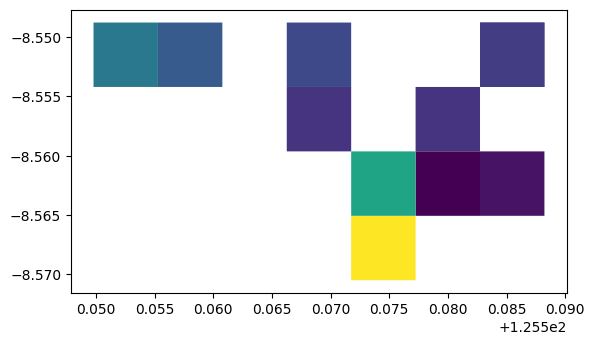

In [13]:
ax = plt.axes()
ookla_gdf.plot(column='avg_d_kbps', ax=ax)

In [14]:
ookla_gdf = ookla_gdf.to_crs("EPSG:4326")

<AxesSubplot: >

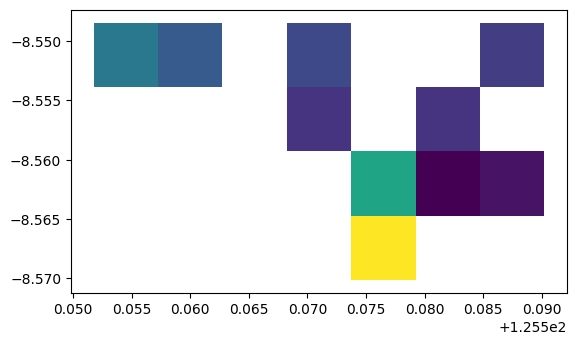

In [15]:
ax = plt.axes()
ookla_gdf.plot(column='avg_d_kbps', ax=ax)

In [16]:
len(ookla_gdf)

11

In [17]:
ookla_gdf.geometry.total_bounds

array([125.5517578 ,  -8.57015774, 125.59020995,  -8.5484298 ])

In [18]:
data_dir2 = Path('../data/SVII_PH_KH_MM_TL/ph/ookla_ph')

In [19]:
%%time
ookla_gdf2 = gpd.read_file(data_dir2/'ph_2020_2_ookla.geojson')

CPU times: user 9.25 s, sys: 254 ms, total: 9.51 s
Wall time: 9.5 s


In [20]:
ookla_gdf2.total_bounds

array([117.38740654,   4.92216319, 126.58843999,  20.78878856])

In [21]:
len(ookla_gdf2)

84950

<AxesSubplot: >

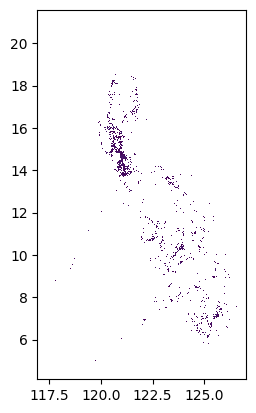

In [22]:
ax = plt.axes()
ookla_gdf2.plot(column='avg_d_kbps', ax=ax)

### Check lat/long column names for DHS clusters

In [23]:
repo_dir = '../test_data/real_outputs'

In [24]:
dhs_countries = ['kh','mm','ph','tl']

In [25]:
dhs_geo_zip_folders = dict(
    kh='KHGE71FL',
    mm='MMGE71FL',
    ph='PHGE71FL',
    tl='TLGE71FL')

In [27]:
def get_cluster_coords(country, repo_dir=repo_dir,dhs_geo_zip_folders=dhs_geo_zip_folders):
    folder = dhs_geo_zip_folders.get(country,None)
    if folder is None:
        raise ValueError(f"No DHS geo_zip_folder found for {country}, only these countries have a DHS geo_zip_folder {dhs_geo_zip_folders.keys()}")
    cluster_coord_path = Path(repo_dir)/f'dhs_{country}'/f'{folder}_cluster_coords.csv'
    if not cluster_coord_path.exists():
        raise ValueError(f"Cluster coords file {cluster_coord_path} is missing!")
    return pd.read_csv(cluster_coord_path)
                         

In [30]:
kh_cluster_coords = get_cluster_coords('kh')
mm_cluster_coords = get_cluster_coords('mm')
ph_cluster_coords = get_cluster_coords('ph')
tl_cluster_coords = get_cluster_coords('tl')

In [31]:
kh_cluster_coords.columns.values

array(['DHSID', 'DHSCC', 'DHSYEAR', 'DHSCLUST', 'CCFIPS', 'ADM1FIPS',
       'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS', 'ADM1NAME',
       'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA', 'LATNUM',
       'LONGNUM', 'ALT_GPS', 'ALT_DEM', 'DATUM', 'geometry'], dtype=object)

In [32]:
mm_cluster_coords.columns.values

array(['DHSID', 'DHSCC', 'DHSYEAR', 'DHSCLUST', 'CCFIPS', 'ADM1FIPS',
       'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS', 'ADM1NAME',
       'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA', 'LATNUM',
       'LONGNUM', 'ALT_GPS', 'ALT_DEM', 'DATUM', 'geometry'], dtype=object)

In [33]:
kh_cluster_coords.columns.values

array(['DHSID', 'DHSCC', 'DHSYEAR', 'DHSCLUST', 'CCFIPS', 'ADM1FIPS',
       'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS', 'ADM1NAME',
       'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA', 'LATNUM',
       'LONGNUM', 'ALT_GPS', 'ALT_DEM', 'DATUM', 'geometry'], dtype=object)

In [34]:
ph_cluster_coords.columns.values

array(['DHSID', 'DHSCC', 'DHSYEAR', 'DHSCLUST', 'CCFIPS', 'ADM1FIPS',
       'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS', 'ADM1NAME',
       'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA', 'LATNUM',
       'LONGNUM', 'ALT_GPS', 'ALT_DEM', 'DATUM', 'geometry'], dtype=object)

In [35]:
tl_cluster_coords.columns.values

array(['DHSID', 'DHSCC', 'DHSYEAR', 'DHSCLUST', 'CCFIPS', 'ADM1FIPS',
       'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS', 'ADM1NAME',
       'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA', 'LATNUM',
       'LONGNUM', 'ALT_GPS', 'ALT_DEM', 'DATUM', 'F21', 'F22', 'F23',
       'geometry'], dtype=object)